# <font color='blue'>Credit Card Fraud Detecion</font>

## Table of Contents 
9. [Classification Models](#i_ID)
    
    9.6 [SVM Classifier](#i6_ID)
    
    9.7 [MLP](#i7_ID)

## <a id="i_ID">9. Classification Models</a>

### <a id="i6_ID">9.6 SVM Classifier</a>

### Without RFE or PCA

In [97]:
from sklearn.svm import SVC

In [98]:
# Train a support vector classifier on the train set
classifier = SVC(kernel = 'rbf', C=1, random_state = 28)
classifier.fit(X_train_sc_smote, y_train_smote)

SVC(C=1, random_state=28)

In [99]:
# Make class predictions for the test set
y_pred_class = classifier.predict(X_test_sc)

In [100]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[69820,  1000],
       [   16,    96]], dtype=int64)

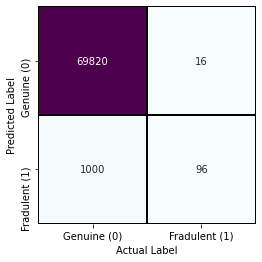

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [115]:
# Save confusion matrix and slice into four sections
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[69820  1000]
 [   16    96]]
True Positive:  96
True Negative:  69820
False Positive:  1000
False Negative:  16


In [116]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9856764224891446


In [117]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.014323577510855445


In [118]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.8571428571428571


In [119]:
# Specificity
print(TN / float(TN + FP))

0.985879695001412


In [120]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.08759124087591241


In [121]:
# False Positive Rate
print(FP / float(TN + FP))

0.01412030499858797


In [122]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.15894039735099338


In [123]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.9215112760721347


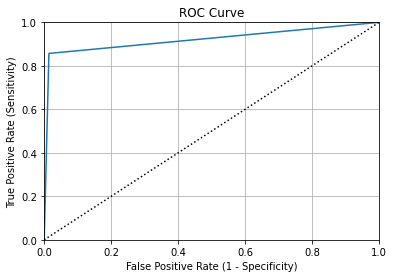

In [124]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [125]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70820
           1       0.09      0.86      0.16       112

    accuracy                           0.99     70932
   macro avg       0.54      0.92      0.58     70932
weighted avg       1.00      0.99      0.99     70932



### With RFE

In [127]:
# Train a support vector classifier on the train set
classifier = SVC(kernel = 'rbf', C=1, random_state = 28)
classifier.fit(X_train_rfe, y_train_smote)

SVC(C=1, random_state=28)

In [128]:
# Make class predictions for the test set
y_pred_class = classifier.predict(X_test_rfe)

In [129]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[69718,  1102],
       [   17,    95]], dtype=int64)

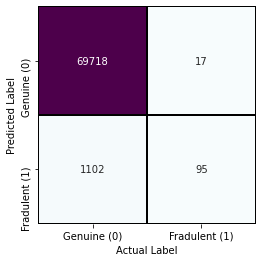

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [131]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[69718  1102]
 [   17    95]]
True Positive:  95
True Negative:  69718
False Positive:  1102
False Negative:  17


In [132]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9842243275249535


In [133]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.01577567247504652


In [134]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.8482142857142857


In [135]:
# Specificity
print(TN / float(TN + FP))

0.984439423891556


In [136]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.07936507936507936


In [137]:
# False Positive Rate
print(FP / float(TN + FP))

0.015560576108443943


In [138]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.14514896867838045


In [139]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.9163268548029208


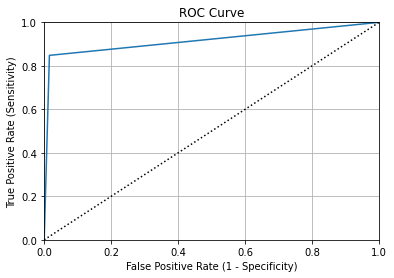

In [140]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [141]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70820
           1       0.08      0.85      0.15       112

    accuracy                           0.98     70932
   macro avg       0.54      0.92      0.57     70932
weighted avg       1.00      0.98      0.99     70932



### With PCA

In [142]:
# Train a support vector classifier on the train set
classifier = SVC(kernel = 'rbf', C=1, random_state = 28)
classifier.fit(X_smote_pca_15, y_train_smote)

SVC(C=1, random_state=28)

In [143]:
# Make class predictions for the test set
y_pred_class = classifier.predict(X_test_pca_15)

In [144]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[69589,  1231],
       [   18,    94]], dtype=int64)

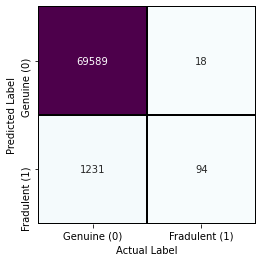

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [146]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[69589  1231]
 [   18    94]]
True Positive:  94
True Negative:  69589
False Positive:  1231
False Negative:  18


In [147]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9823915863080133


In [148]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.017608413691986735


In [149]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.8392857142857143


In [150]:
# Specificity
print(TN / float(TN + FP))

0.9826179045467383


In [151]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.0709433962264151


In [152]:
# False Positive Rate
print(FP / float(TN + FP))

0.01738209545326179


In [153]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.13082811412665277


In [154]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.9109518094162264


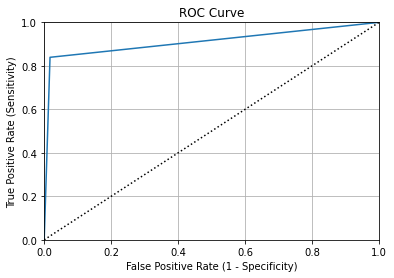

In [155]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [156]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     70820
           1       0.07      0.84      0.13       112

    accuracy                           0.98     70932
   macro avg       0.54      0.91      0.56     70932
weighted avg       1.00      0.98      0.99     70932



### <a id="i7_ID">9.7 MLP</a>

### Without RFE or PCA

In [157]:
from sklearn.neural_network import MLPClassifier

In [158]:
# Train a multilayer perceptron model on the train set
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=29)
clf.fit(X_train_sc_smote, y_train_smote)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=29)

In [159]:
# Make class predictions for the test set
y_pred_class = clf.predict(X_test_sc)

In [160]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[70329,   491],
       [   18,    94]], dtype=int64)

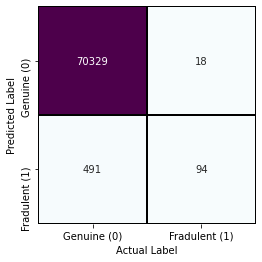

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [162]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[70329   491]
 [   18    94]]
True Positive:  94
True Negative:  70329
False Positive:  491
False Negative:  18


In [163]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9928241132352111


In [164]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0071758867647888636


In [165]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.8392857142857143


In [166]:
# Specificity
print(TN / float(TN + FP))

0.9930669302456933


In [167]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.1606837606837607


In [168]:
# False Positive Rate
print(FP / float(TN + FP))

0.006933069754306693


In [169]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.26972740315638455


In [170]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.9161763222657038


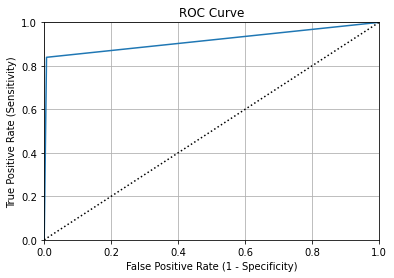

In [171]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [172]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     70820
           1       0.16      0.84      0.27       112

    accuracy                           0.99     70932
   macro avg       0.58      0.92      0.63     70932
weighted avg       1.00      0.99      1.00     70932



### With RFE

In [173]:
# Train a multilayer perceptron model on the train set
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=29)
clf.fit(X_train_rfe, y_train_smote)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=29)

In [174]:
# Make class predictions for the test set
y_pred_class = clf.predict(X_test_rfe)

In [175]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[70104,   716],
       [   19,    93]], dtype=int64)

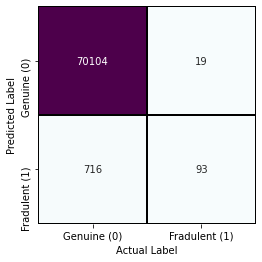

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [177]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[70104   716]
 [   19    93]]
True Positive:  93
True Negative:  70104
False Positive:  716
False Negative:  19


In [178]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.9896379631196075


In [179]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.0103620368803925


In [180]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.8303571428571429


In [181]:
# Specificity
print(TN / float(TN + FP))

0.989889861621011


In [182]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.11495673671199011


In [183]:
# False Positive Rate
print(FP / float(TN + FP))

0.010110138378988985


In [184]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.2019543973941368


In [185]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.9101235022390769


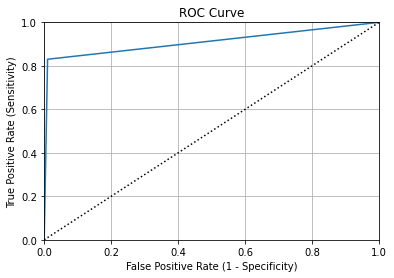

In [186]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [187]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     70820
           1       0.11      0.83      0.20       112

    accuracy                           0.99     70932
   macro avg       0.56      0.91      0.60     70932
weighted avg       1.00      0.99      0.99     70932



### With PCA

In [188]:
# Train a multilayer perceptron model on the train set
clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=29)
clf.fit(X_smote_pca_15, y_train_smote)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=29)

In [189]:
# Make class predictions for the test set
y_pred_class = clf.predict(X_test_pca_15)

In [190]:
# Confusion matrix
# Note: first argument is true values, second argument is predicted values
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
cm

array([[68610,  2210],
       [   14,    98]], dtype=int64)

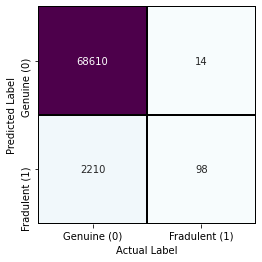

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns;
faceLabels = ['Genuine (0)','Fradulent (1)']
mat = confusion_matrix(y_test, y_pred_class)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels = faceLabels, cmap="BuPu", linecolor='black', linewidths=1,
            yticklabels = faceLabels)
plt.xlabel('Actual Label')
plt.ylabel('Predicted Label');
plt.show()

In [192]:
# Save confusion matrix and slice into four sections
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
print("True Positive: ",TP)
print("True Negative: ",TN)
print("False Positive: ",FP)
print("False Negative: ",FN)

[[68610  2210]
 [   14    98]]
True Positive:  98
True Negative:  68610
False Positive:  2210
False Negative:  14


In [193]:
# Classification Accuracy
#print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, y_pred_class))

0.968646027180962


In [194]:
# Classification Error
#print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, y_pred_class))

0.031353972819037956


In [195]:
# Sensitivity or Recall
recall = (TP / float(TP + FN))
#print(TP / float(TP + FN))
print(metrics.recall_score(y_test, y_pred_class))

0.875


In [196]:
# Specificity
print(TN / float(TN + FP))

0.9687941259531205


In [197]:
# Precision
precision = (TP / float(TP + FP))
print(TP / float(TP + FP))

0.04246100519930676


In [198]:
# False Positive Rate
print(FP / float(TN + FP))

0.03120587404687941


In [199]:
# F-measure
print((2 * precision * recall) / (precision + recall))

0.0809917355371901


In [200]:
# AUC
print(metrics.roc_auc_score(y_test, y_pred_class))

0.9218970629765603


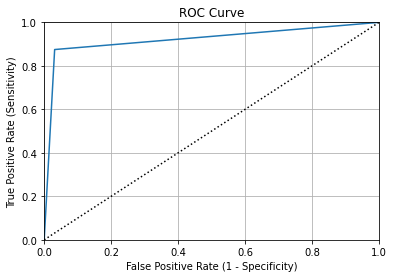

In [201]:
# ROC Curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_class)
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], linestyle=':', c='black')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [202]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     70820
           1       0.04      0.88      0.08       112

    accuracy                           0.97     70932
   macro avg       0.52      0.92      0.53     70932
weighted avg       1.00      0.97      0.98     70932

